Epoch 1/50
358/358 [==============================] - 2s 4ms/step - loss: 0.6707 - accuracy: 0.7439 - val_loss: 0.7612 - val_accuracy: 0.5122
Epoch 2/50
358/358 [==============================] - 1s 3ms/step - loss: 0.6238 - accuracy: 0.7762 - val_loss: 0.7014 - val_accuracy: 0.5521
Epoch 3/50
358/358 [==============================] - 1s 3ms/step - loss: 0.6124 - accuracy: 0.7764 - val_loss: 0.7772 - val_accuracy: 0.5331
Epoch 4/50
358/358 [==============================] - 1s 3ms/step - loss: 0.6059 - accuracy: 0.7789 - val_loss: 0.7632 - val_accuracy: 0.5617
Epoch 5/50
358/358 [==============================] - 2s 5ms/step - loss: 0.5979 - accuracy: 0.7810 - val_loss: 0.7247 - val_accuracy: 0.6075
Epoch 6/50
358/358 [==============================] - 2s 4ms/step - loss: 0.5938 - accuracy: 0.7829 - val_loss: 0.6904 - val_accuracy: 0.6304
Epoch 7/50
358/358 [==============================] - 1s 3ms/step - loss: 0.5888 - accuracy: 0.7824 - val_loss: 0.7250 - val_accuracy: 0.6133
Epoch 

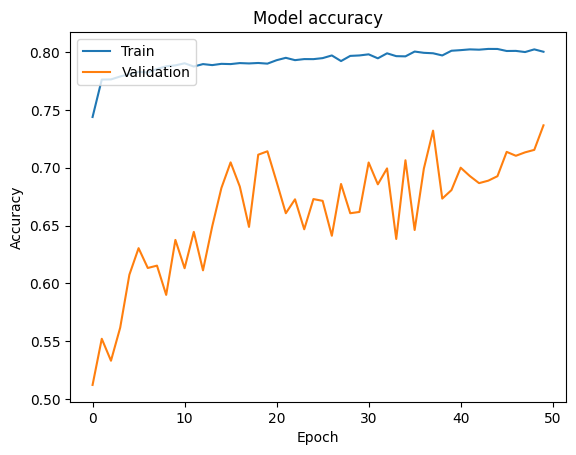

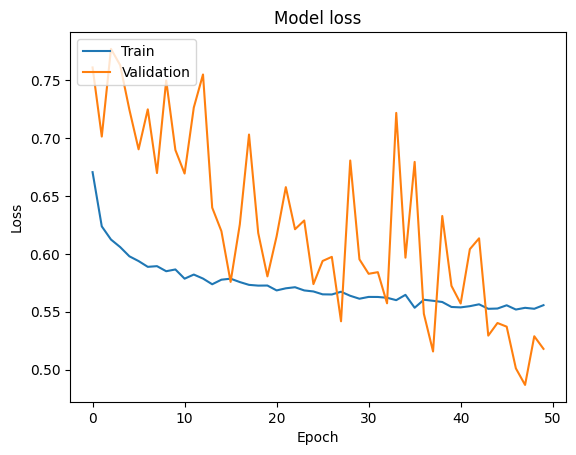

In [18]:
# This is the third iteration of the model I created, with the most optimised hyperparameters for the most true positives and negatives

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the data
data = pd.read_excel("CCD.xls", skiprows=1)

# Separate features and target variable
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=32)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model definition
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

class_weights = {
    0: 1,
    1: 1.35
}

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.3, class_weight = class_weights)

# Evaluate the model
score = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# After training your model and doing the evaluation, make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f'F1 score: {f1}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


235/235 [==============================] - 0s 1ms/step


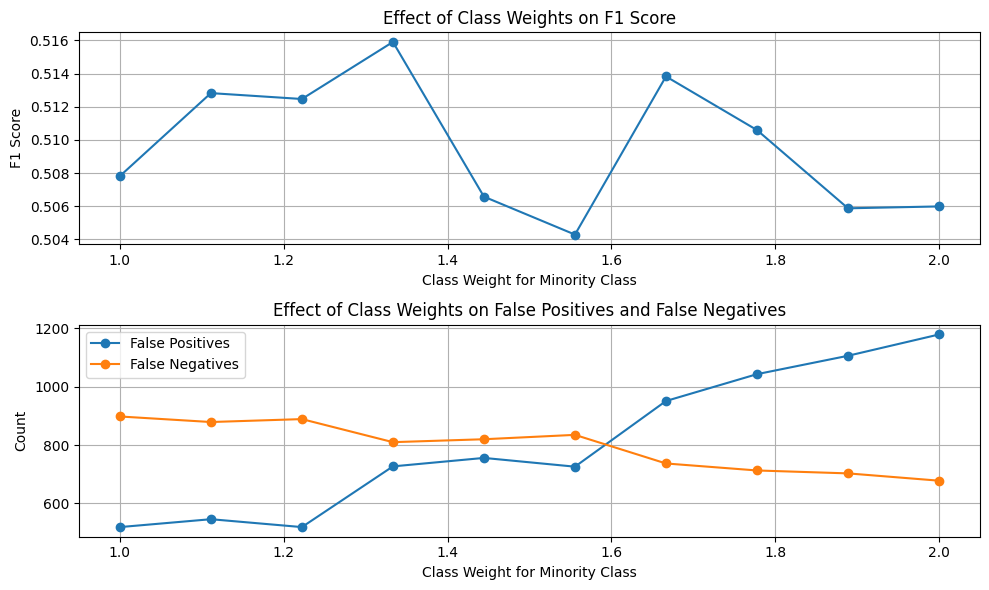

In [21]:
# ------ CODE TO DIFFERENT CLASS WEIGHTS ------

# import matplotlib.pyplot as plt
# from sklearn.metrics import f1_score, confusion_matrix
# import numpy as np

# Define a range of class weights to experiment with
# class_weight_range = np.linspace(1, 2, 10)

# Lists to store results
# f1_scores = []
# false_positives = []
# false_negatives = []

# Iterate through different class weights
# for weight in class_weight_range:
#     class_weights = {
#         0: 1,
#         1: weight
#     }

    # Compile the model with current class weights
    # model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model with the current class weights
    # history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, class_weight=class_weights, verbose=0)

    # Make predictions on test data
    # y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

    # Calculate F1 score
    # f1 = f1_score(y_test, y_pred)

    # Generate the confusion matrix
    # conf_matrix = confusion_matrix(y_test, y_pred)

    # Extract false positives and false negatives from confusion matrix
    # _, fp, fn, _ = conf_matrix.ravel()

    # Append results to respective lists
    # f1_scores.append(f1)
    # false_positives.append(fp)
    # false_negatives.append(fn)

# Plotting
# plt.figure(figsize=(10, 6))

# Plot F1 score
# plt.subplot(2, 1, 1)
# plt.plot(class_weight_range, f1_scores, marker='o')
# plt.title('Effect of Class Weights on F1 Score')
# plt.xlabel('Class Weight for Minority Class')
# plt.ylabel('F1 Score')
# plt.grid(True)

# Plot false positives and false negatives
# plt.subplot(2, 1, 2)
# plt.plot(class_weight_range, false_positives, label='False Positives', marker='o')
# plt.plot(class_weight_range, false_negatives, label='False Negatives', marker='o')
# plt.title('Effect of Class Weights on False Positives and False Negatives')
# plt.xlabel('Class Weight for Minority Class')
# plt.ylabel('Count')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()


Test loss with StandardScaler: 0.45788508653640747
Test accuracy with StandardScaler: 0.8116666674613953
188/188 [==============================] - 0s 1ms/step
F1 score with StandardScaler: 0.5260067114093959
Test loss with MinMaxScaler: 0.49976691603660583
Test accuracy with MinMaxScaler: 0.7835000157356262
188/188 [==============================] - 0s 2ms/step
F1 score with MinMaxScaler: 0.5133008617459722


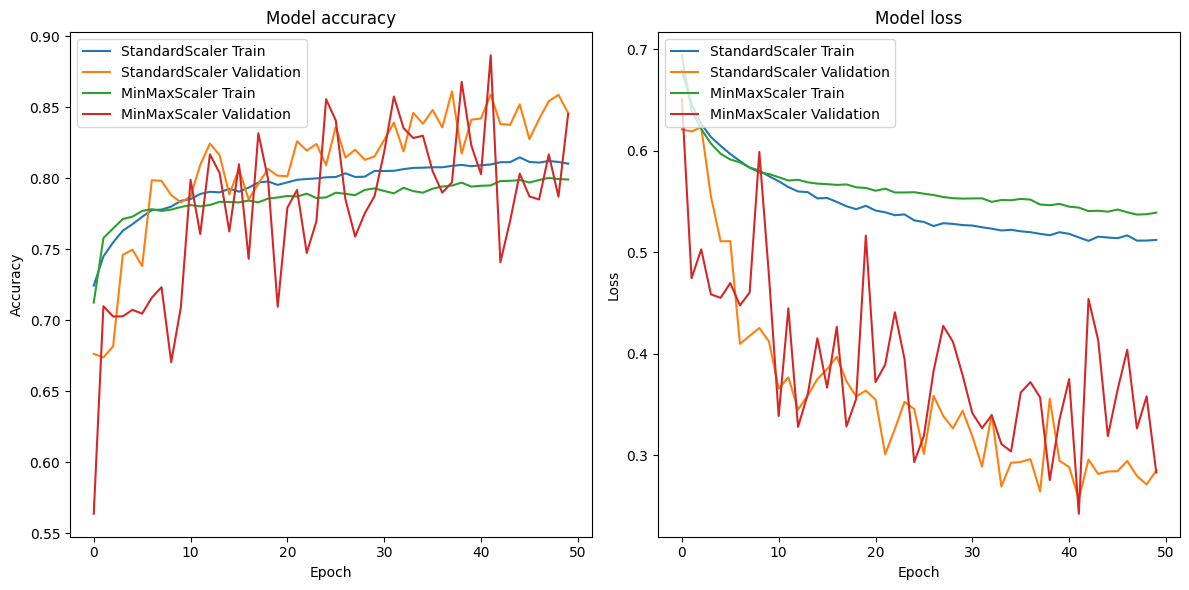

In [30]:
# ------ CODE TO TEST MIN AND MAX SCALERS ------


#from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Define a function to create and train the model
# def train_model(scaler):
#     # Normalize the features using the specified scaler
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Model definition
#     model = Sequential([
#         Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
#         Dropout(0.2),
#         Dense(64, activation='relu'),
#         Dropout(0.2),
#         Dense(32, activation='relu'),
#         Dropout(0.2),
#         Dense(32, activation='relu'),
#         Dropout(0.2),
#         Dense(16, activation='relu'),
#         Dropout(0.2),
#         Dense(1, activation='sigmoid')
#     ])

#     # Compile the model
#     model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

#     class_weights = {
#         0: 1,
#         1: 1.35
#     }

#     # Train the model
#     history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, class_weight=class_weights, verbose=0)

#     # Evaluate the model
#     score = model.evaluate(X_test_scaled, y_test, verbose=0)
#     print(f'Test loss with {scaler.__class__.__name__}: {score[0]}')
#     print(f'Test accuracy with {scaler.__class__.__name__}: {score[1]}')

#     # Calculate F1 score
#     y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
#     f1 = f1_score(y_test, y_pred)
#     print(f'F1 score with {scaler.__class__.__name__}: {f1}')

#     return history

# # Create instances of StandardScaler and MinMaxScaler
# standard_scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()

# # Train the model with StandardScaler
# history_standard = train_model(standard_scaler)

# # Train the model with MinMaxScaler
# history_minmax = train_model(minmax_scaler)

# # Plot training & validation accuracy values for both scalers
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_standard.history['accuracy'], label='StandardScaler Train')
# plt.plot(history_standard.history['val_accuracy'], label='StandardScaler Validation')
# plt.plot(history_minmax.history['accuracy'], label='MinMaxScaler Train')
# plt.plot(history_minmax.history['val_accuracy'], label='MinMaxScaler Validation')
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_standard.history['loss'], label='StandardScaler Train')
# plt.plot(history_standard.history['val_loss'], label='StandardScaler Validation')
# plt.plot(history_minmax.history['loss'], label='MinMaxScaler Train')
# plt.plot(history_minmax.history['val_loss'], label='MinMaxScaler Validation')
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')

# plt.tight_layout()
# plt.show()
